In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'bank-full (1).csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
df = df.loc[:,['balance','housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]
df

,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,2143,yes,no,261,1,-1,0,unknown,no
1,29,yes,no,151,1,-1,0,unknown,no
2,2,yes,yes,76,1,-1,0,unknown,no
3,1506,yes,no,92,1,-1,0,unknown,no
4,1,no,no,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...
45206,825,no,no,977,3,-1,0,unknown,yes
45207,1729,no,no,456,2,-1,0,unknown,yes
45208,5715,no,no,1127,5,184,3,success,yes
45209,668,no,no,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   balance   45211 non-null  int64 
 1   housing   45211 non-null  object
 2   loan      45211 non-null  object
 3   duration  45211 non-null  int64 
 4   campaign  45211 non-null  int64 
 5   pdays     45211 non-null  int64 
 6   previous  45211 non-null  int64 
 7   poutcome  45211 non-null  object
 8   y         45211 non-null  object
dtypes: int64(5), object(4)
memory usage: 3.1+ MB


In [5]:
df.describe()

,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,258.163080,2.763841,40.197828,0.580323
std,3044.765829,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Split x and y

x = df.iloc[:,:-1]
y= df.iloc[:,-1]
x

,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,2143,yes,no,261,1,-1,0,unknown
1,29,yes,no,151,1,-1,0,unknown
2,2,yes,yes,76,1,-1,0,unknown
3,1506,yes,no,92,1,-1,0,unknown
4,1,no,no,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...
45206,825,no,no,977,3,-1,0,unknown
45207,1729,no,no,456,2,-1,0,unknown
45208,5715,no,no,1127,5,184,3,success
45209,668,no,no,508,4,-1,0,unknown


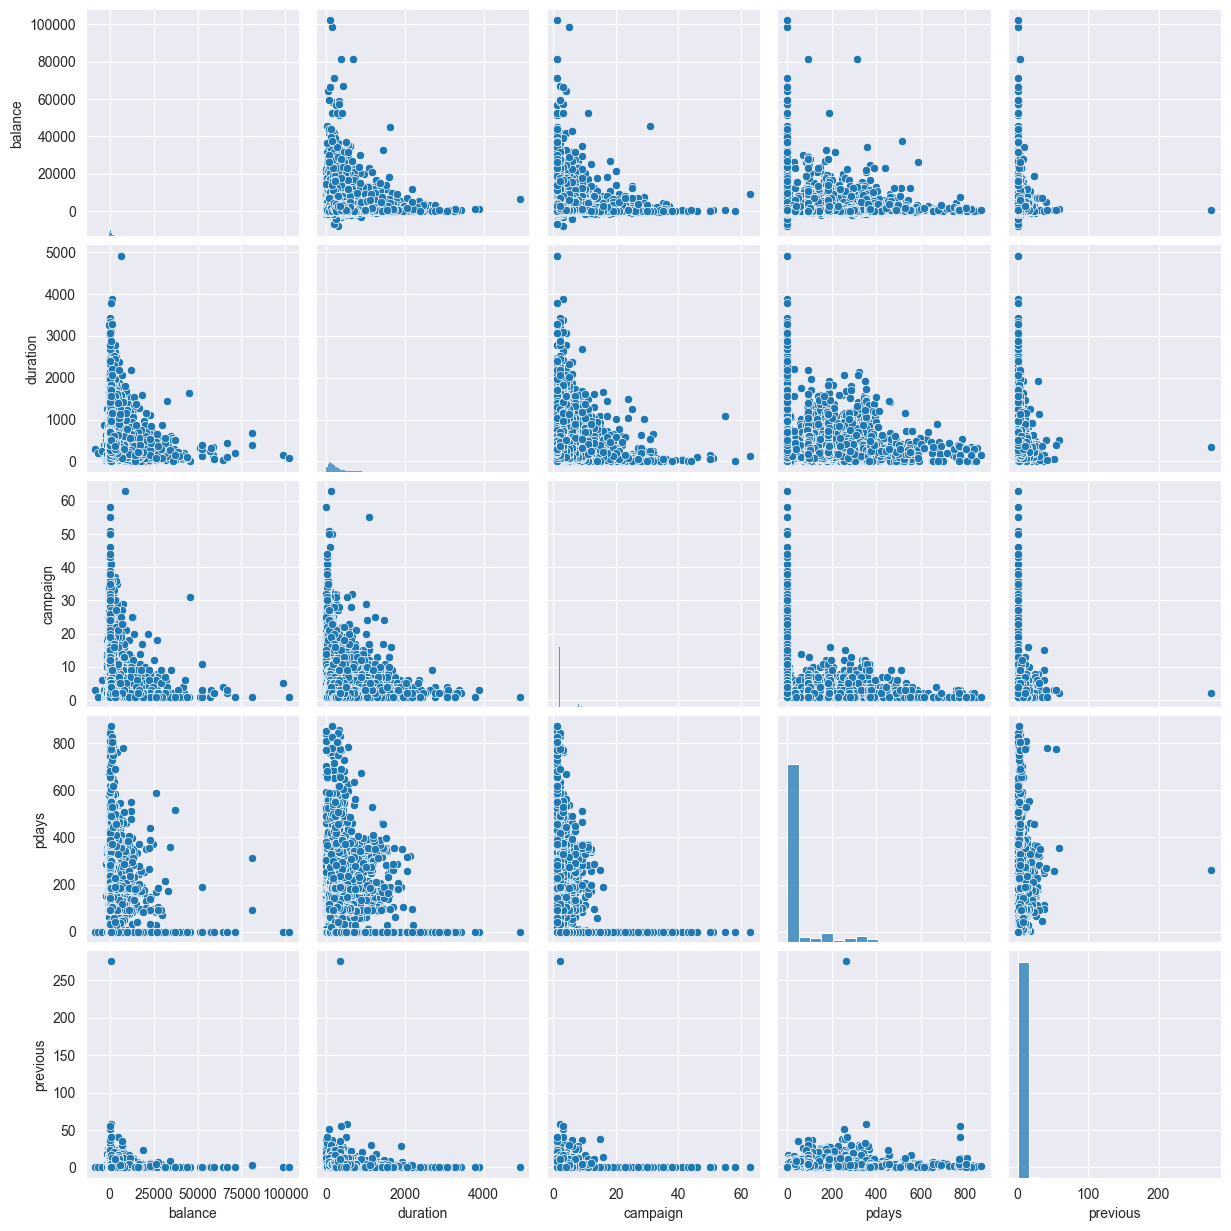

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(x)
plt.show()

In [8]:
# importing ordinal and label encoder to convert catergorical column in 0 and 1

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [9]:
oe = OrdinalEncoder()
le = LabelEncoder()

In [10]:
cat_col = x.select_dtypes(object).columns
cat_col

Index(['housing', 'loan', 'poutcome'], dtype='object')

In [11]:
x[cat_col] = oe.fit_transform(x[cat_col])
x

,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,2143,1.0,0.0,261,1,-1,0,3.0
1,29,1.0,0.0,151,1,-1,0,3.0
2,2,1.0,1.0,76,1,-1,0,3.0
3,1506,1.0,0.0,92,1,-1,0,3.0
4,1,0.0,0.0,198,1,-1,0,3.0
...,...,...,...,...,...,...,...,...
45206,825,0.0,0.0,977,3,-1,0,3.0
45207,1729,0.0,0.0,456,2,-1,0,3.0
45208,5715,0.0,0.0,1127,5,184,3,2.0
45209,668,0.0,0.0,508,4,-1,0,3.0


In [12]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [13]:
x

,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,2143,1.0,0.0,261,1,-1,0,3.0
1,29,1.0,0.0,151,1,-1,0,3.0
2,2,1.0,1.0,76,1,-1,0,3.0
3,1506,1.0,0.0,92,1,-1,0,3.0
4,1,0.0,0.0,198,1,-1,0,3.0
...,...,...,...,...,...,...,...,...
45206,825,0.0,0.0,977,3,-1,0,3.0
45207,1729,0.0,0.0,456,2,-1,0,3.0
45208,5715,0.0,0.0,1127,5,184,3,2.0
45209,668,0.0,0.0,508,4,-1,0,3.0


In [14]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

# Model Building

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

In [20]:
len(xtest), len(ypred)

(13564, 13564)

In [21]:
print('Actual y values: ', ytest[:14])
print('Predict y values:', ypred[:14])

Actual y values:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
Predict y values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Testing Model Accuracy

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [23]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.53      0.21      0.30      1551

    accuracy                           0.89     13564
   macro avg       0.72      0.59      0.62     13564
weighted avg       0.86      0.89      0.87     13564



In [24]:
print(confusion_matrix(ytest, ypred))

[[11724   289]
 [ 1220   331]]


In [25]:
# calculating the Accuracy of the model by (a+d)/(a+b+c+d)

(11724+331)/(11724+289+1220+331)

0.8887496313771749

Accuracy of model is 88.88%

In [26]:
# Accuracy by built in function

print(np.round(lr.score(xtrain, ytrain),2))
print(np.round(lr.score(xtest, ytest),2))

0.89
0.89


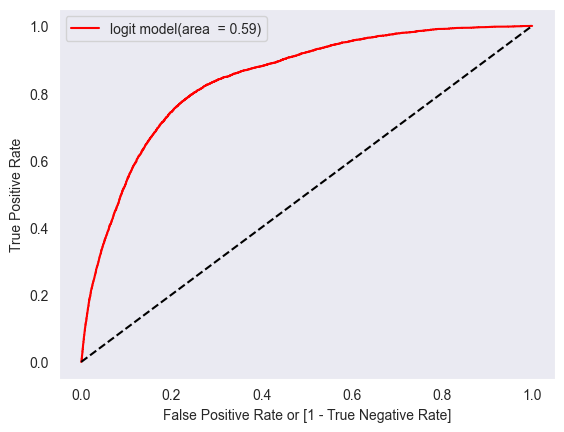

auc accuracy: 0.5946767157414842


In [27]:
# plotting ROC curve and auc value

fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])
auc=roc_auc_score(ytest,ypred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

print('auc accuracy:',auc)